In [1]:
import numpy as np
import pandas as pd
import sys

from learningCurve import *
from modelSpecificities import *
from funcs_loadData import *

/Users/mingyusong/anaconda3/envs/rule-learning/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# version of the experiment
expVersion = 'all'

# which variables to plot learning curves on:
varNameList = ['ExpectedReward', 'NumSelected']

plotType = 'separate'
wIndividualCurves = False
empiricalChance = True
wLegend = False
showFigure = True
printCSV = False
runANOVA = False
wTitleAxLabel = True

fontsize = 20

In [3]:
## Read the data from csv
data, workerIds = load_data(expVersion, getWorkerIds=True)

### Data (Fig 2A,B)

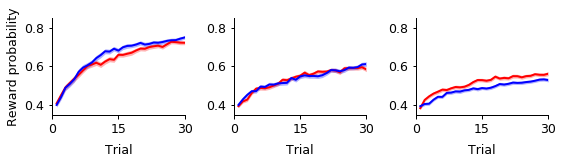

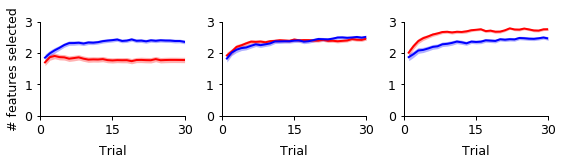

In [4]:
# main figures
for varName in varNameList:
    fig, axes = plotLearningCurves(varName, data=data, plotType='separate', wIndividualCurves=wIndividualCurves,
                       empiricalChance=empiricalChance, wLegend=wLegend, showFigure=showFigure, printcsv=False,
                       runANOVA=False, expVersion=expVersion, wTitleAxLabel=wTitleAxLabel, fontsize=fontsize, xticklabels=[0, 15, 30], ifPublish=True, plotChance=False)

### Fig S1A,B

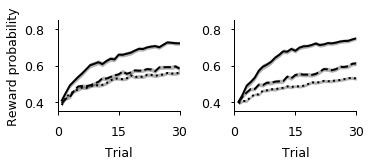

In [5]:
varName = 'ExpectedReward'

plt.rcParams.update({'font.size': fontsize})

## Get exp info
# Get the list of participants and their worker IDs
workerIds = data['workerId'].unique()

# Get game variables
gameLength = DataFrame.max(data['trial'])
numGamePerType = int(DataFrame.max(data['game']) / 3 / 2)
trialIndex = np.arange(gameLength)

## Plotting
title = {
    'NumSelected': '# features selected',
    'ExpectedReward': 'Reward probability',
}

fig, axes = plt.subplots(1, 2, sharex=True, figsize=(8/3*2, 2.5))
fontsize = 12.5
plt.rcParams.update({'font.size': fontsize})
linewidth = 2
axes_linewidth = 1 #1.3
linestyle = {
    1: '-',
    2: 'dashed',
    3: 'dotted'
}

dfANOVAList_all = []
for numRelevantDimensions in np.arange(3) + 1:
    
    for idx, informed in enumerate([True, False]):
        learning_curves = []
        for participant, workerId in enumerate(workerIds):
            current_df = data[(data['workerId'] == workerId) & (data['numRelevantDimensions'] == numRelevantDimensions) & (
                            data['informed'] == informed)].copy()
            if current_df.shape[0] > 0:
                learning_curve, _ = get_learning_curve(current_df, varName, numRelevantDimensions)
                learning_curves.append(learning_curve)
        ax = axes[idx]
        average_values = np.squeeze(np.nanmean(np.stack(learning_curves, axis=1),axis=1))
        sem_values = np.squeeze(np.nanstd(np.stack(learning_curves, axis=1),axis=1)/np.sqrt(np.stack(learning_curves, axis=1).shape[1]))
        trial_index = np.arange(30)+1
        varPlot = ax.plot(trial_index, average_values, color='k', lw=linewidth, linestyle=linestyle[numRelevantDimensions])[0]
        ax.fill_between(trial_index, average_values - sem_values, average_values + sem_values, lw=0, alpha=0.3, color='k')
    
    sns.despine()

    for ax in axes:
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.tick_params(axis='both', length=3.5, labelsize=fontsize, pad=4.5, width=axes_linewidth)
        ax.set_xlim([0, 30])
        xticklabels = [0, 15, 30]
        ax.set_xticks(xticklabels)
        ax.set_xticklabels(xticklabels)
        ax.set_xlabel('Trial', labelpad=8, fontsize=fontsize)
        ax.spines['bottom'].set_linewidth(axes_linewidth)
        ax.spines['left'].set_linewidth(axes_linewidth)
        ylimValues = {
            'NumSelected': [0, 3],
            'ExpectedReward': [0.35, 0.85],
        }
        ax.set_ylim(ylimValues[varName][0],ylimValues[varName][1])
        ax.tick_params(axis='both', labelsize=fontsize, pad=10)
    axes[0].set_ylabel(title[varName], fontsize=fontsize)
    plt.subplots_adjust(wspace=0.4, top=0.75, bottom=0.25)
    plt.tight_layout()

### Model simulation (Fig 4B,C)

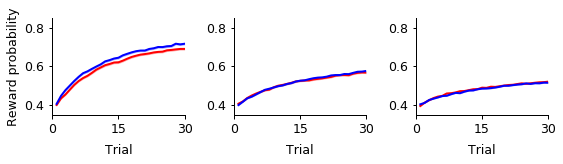

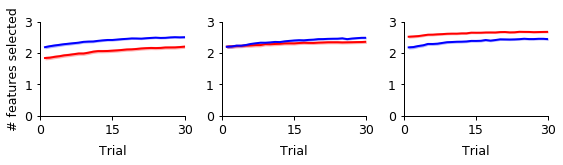

In [6]:
model = 'inferSerialHypoTesting_CountingValueBasedSwitchNoResetDecayEpsilonNoCost_FlexibleHypoAvg'

# load simulated data
dataSimu = pd.read_csv('modelSimulation/' + model + '.csv')

# plotting
for varName in varNameList:
    fig, axes = plotLearningCurves(varName, data=dataSimu, plotType='separate', wIndividualCurves=wIndividualCurves,
                    empiricalChance=empiricalChance, wLegend=wLegend, showFigure=showFigure, printcsv=printCSV, runANOVA=runANOVA, 
                    expVersion=expVersion, wTitleAxLabel=wTitleAxLabel, fontsize=fontsize, xticklabels=[0, 15, 30], ifPublish=True, plotChance=False)

### Supplementary figures (Fig S2)

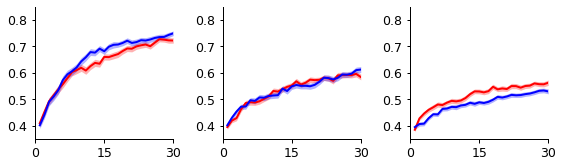

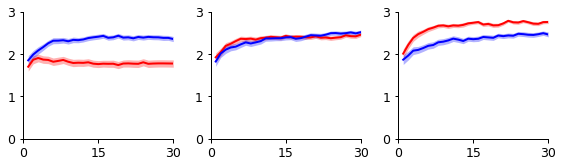

In [7]:
for varName in varNameList:
    fig, axes = plotLearningCurves(varName, data=data, plotType='separate', wIndividualCurves=wIndividualCurves,
                       empiricalChance=empiricalChance, wLegend=wLegend, showFigure=showFigure, printcsv=printCSV, runANOVA=runANOVA,
                       expVersion=expVersion, wTitleAxLabel=False, fontsize=fontsize, xticklabels=[0, 15, 30], ifPublish=True, plotChance=False)

In [8]:
allModels = [
    'featureRLwDecayNoCost',
    'inferSerialHypoTesting_CountingRandomSwitchEpsilonNoCost_FlexibleHypoAvg',
    'inferSerialHypoTesting_CountingValueBasedSwitchNoResetDecayEpsilonNoCost_FlexibleHypoAvg',
    'inferSerialHypoTesting_CountingValueBasedSwitchNoResetDecayThresonTestSelectMoreNoCost_FlexibleHypoAvg',
]

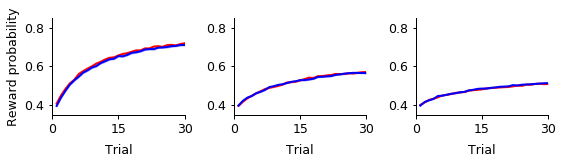

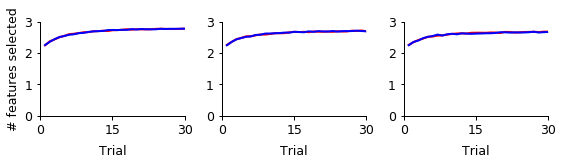

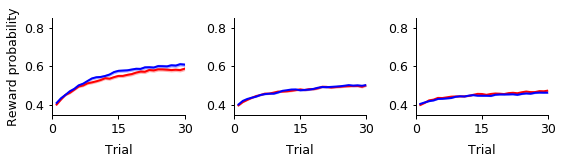

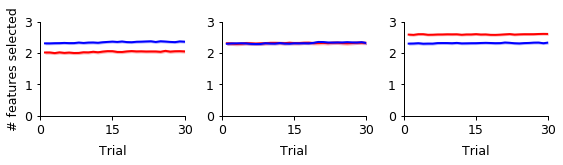

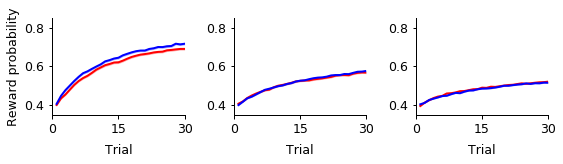

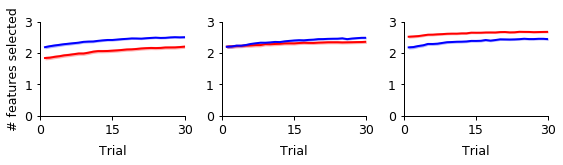

/Users/mingyusong/anaconda3/envs/rule-learning/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (10,15,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


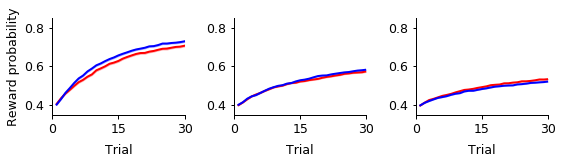

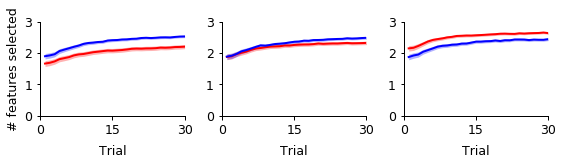

In [9]:
for model in allModels:
    # load simulated data
    dataSimu = pd.read_csv('modelSimulation/' + model + '.csv')
    
    # plotting
    for varName in varNameList:
        fig, axes = plotLearningCurves(varName, data=dataSimu, plotType='separate', wIndividualCurves=wIndividualCurves,
                        empiricalChance=empiricalChance, wLegend=wLegend, showFigure=showFigure, printcsv=printCSV, runANOVA=runANOVA, 
                        expVersion=expVersion, wTitleAxLabel=True, fontsize=fontsize, xticklabels=[0, 15, 30], ifPublish=True, plotChance=False)
        for ax in axes:
            ax.set_ylabel('')
            if model != allModels[-1]:
                ax.set_xlabel('')